<a href="https://colab.research.google.com/github/HRKagdi/Machine-Learning/blob/master/MiniBatchGradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [0]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [3]:
#Loading the Boston Housing Dataset
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
print(X.shape)

(506, 13)


In [0]:
#Dividing the dataset into training and test 
x_train=X[0:400,:]
y_train=y[0:400]
x_test=X[400:506,:]
y_test=y[400:506]

In [0]:
sc=StandardScaler()
sc.fit(x_train)
#Normalization
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [6]:
print(x_train.shape)

(400, 13)


In [0]:
#Initailizing the parameters randomly
Theta=np.random.rand(14,1)

In [0]:
#Adding the dummy independent variable
Theta[0]=1

In [9]:
print(Theta)

[[1.        ]
 [0.57764739]
 [0.39708512]
 [0.68981213]
 [0.80629402]
 [0.19546204]
 [0.64161193]
 [0.97328496]
 [0.62101258]
 [0.3043185 ]
 [0.45681361]
 [0.83417932]
 [0.4164412 ]
 [0.76068957]]


In [0]:
#Adding the dummy independent variable
x_train=np.insert(x_train,0,1,axis=1)
x_test=np.insert(x_test,0,1,axis=1)

In [0]:
y_train=y_train.reshape(400,1)
y_test=y_test.reshape(106,1)

In [14]:
print(x_train.shape)

(400, 14)


In [0]:
#Cost Function::Mean Square Error
def Cost_function(x_train,y_train,Theta):
    m=x_train.shape[0]
    J_Theta=(1/(2*m))*np.sum(pow((np.dot(x_train,Theta)-y_train),2))
    return J_Theta  

In [0]:
#Gradient Descent Algorithm
def GradientDescent(x_train,y_train,alpha,Theta):
  x_mini=x_train[0:50,:]
  y_mini=y_train[0:50,:]
  J_Theta=Cost_function(x_mini,y_mini,Theta)
  cost_list=[]
  i=0
  print(J_Theta)
  dict={}
  temp=1000000
  max_iterations=15000
  size_of_mini_batch=50
  number_of_mini_batches=(int)(x_train.shape[0]/size_of_mini_batch)
  while(True):
    lx=0
    rx=50
    if(temp-J_Theta<0.00001 and i>max_iterations):
      break
    temp=J_Theta
    for j in range (1,number_of_mini_batches):
      x_mini=x_train[lx:rx,:]
      y_mini=y_train[lx:rx,:]
      J_Theta=Cost_function(x_mini,y_mini,Theta)
      Theta=Theta-(1/size_of_mini_batch)*alpha*(np.dot(x_mini.transpose(),np.dot(x_mini,Theta)-y_mini))
      lx=lx+50
      rx=rx+50
      if(lx==400):
        break
    cost_list.append(J_Theta)
    i+=1
  #plt.show
  dict['cost']=J_Theta
  dict['parameters']=Theta
  dict['Error']=cost_list
  dict['No_of_Iter']=i
  return dict

In [17]:
#Displaying the traning error
cost=GradientDescent(x_train,y_train,0.001,Theta)
print(cost['cost'])

227.17448902215762
2.5659239370457763


In [18]:
param=cost['parameters']
print(param)

[[23.87615652]
 [-0.25246296]
 [ 0.33314975]
 [ 0.33053846]
 [ 0.23725136]
 [-0.54951178]
 [ 6.79239955]
 [-1.38338751]
 [-2.10602559]
 [ 0.96216478]
 [-1.78841293]
 [-1.52849559]
 [ 0.45781658]
 [-0.53042874]]


In [19]:
test_error=Cost_function(x_test,y_test,param)
print(test_error)

14.893885759775696


<function matplotlib.pyplot.show>

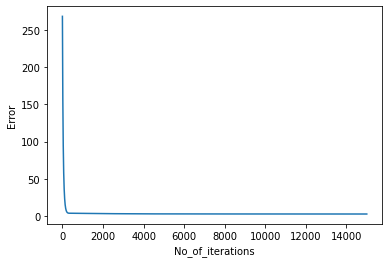

In [20]:
i=cost['No_of_Iter']
iter=np.arange(0,i)
error=cost['Error']
plt.plot(iter,error)
plt.xlabel('No_of_iterations')
plt.ylabel('Error')
plt.show

In [21]:
m=x_test.shape[0]
test_cost=(1/(2*m))*np.sum(pow((np.dot(x_test,param)-y_test),2))
print(test_cost)

14.893885759775696


In [0]:
#The test accuracy was found minimum for max_no_of_iterations=15000